In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sp
import seaborn as sns
import itertools

In [2]:
Loan=pd.read_csv("loan_data.csv")

In [3]:
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
Loan.shape

(614, 13)

# Data cleaning

In [7]:
#null value
Loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#loan amount  credit history and loan amont term is inportant for loan prediction so we fill with mean median 

Loan['LoanAmount']=Loan["LoanAmount"].fillna(Loan["LoanAmount"].mean())
Loan['Credit_History']=Loan["Credit_History"].fillna(Loan["Credit_History"].median())

In [9]:
Loan.isnull().sum()
#checking null values fill or not

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
Loan["LoanAmount"]

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [11]:
#dropping remaing drop na
Loan.dropna(inplace=True)

In [12]:
Loan.shape

(542, 13)

C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranali\anaconda

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

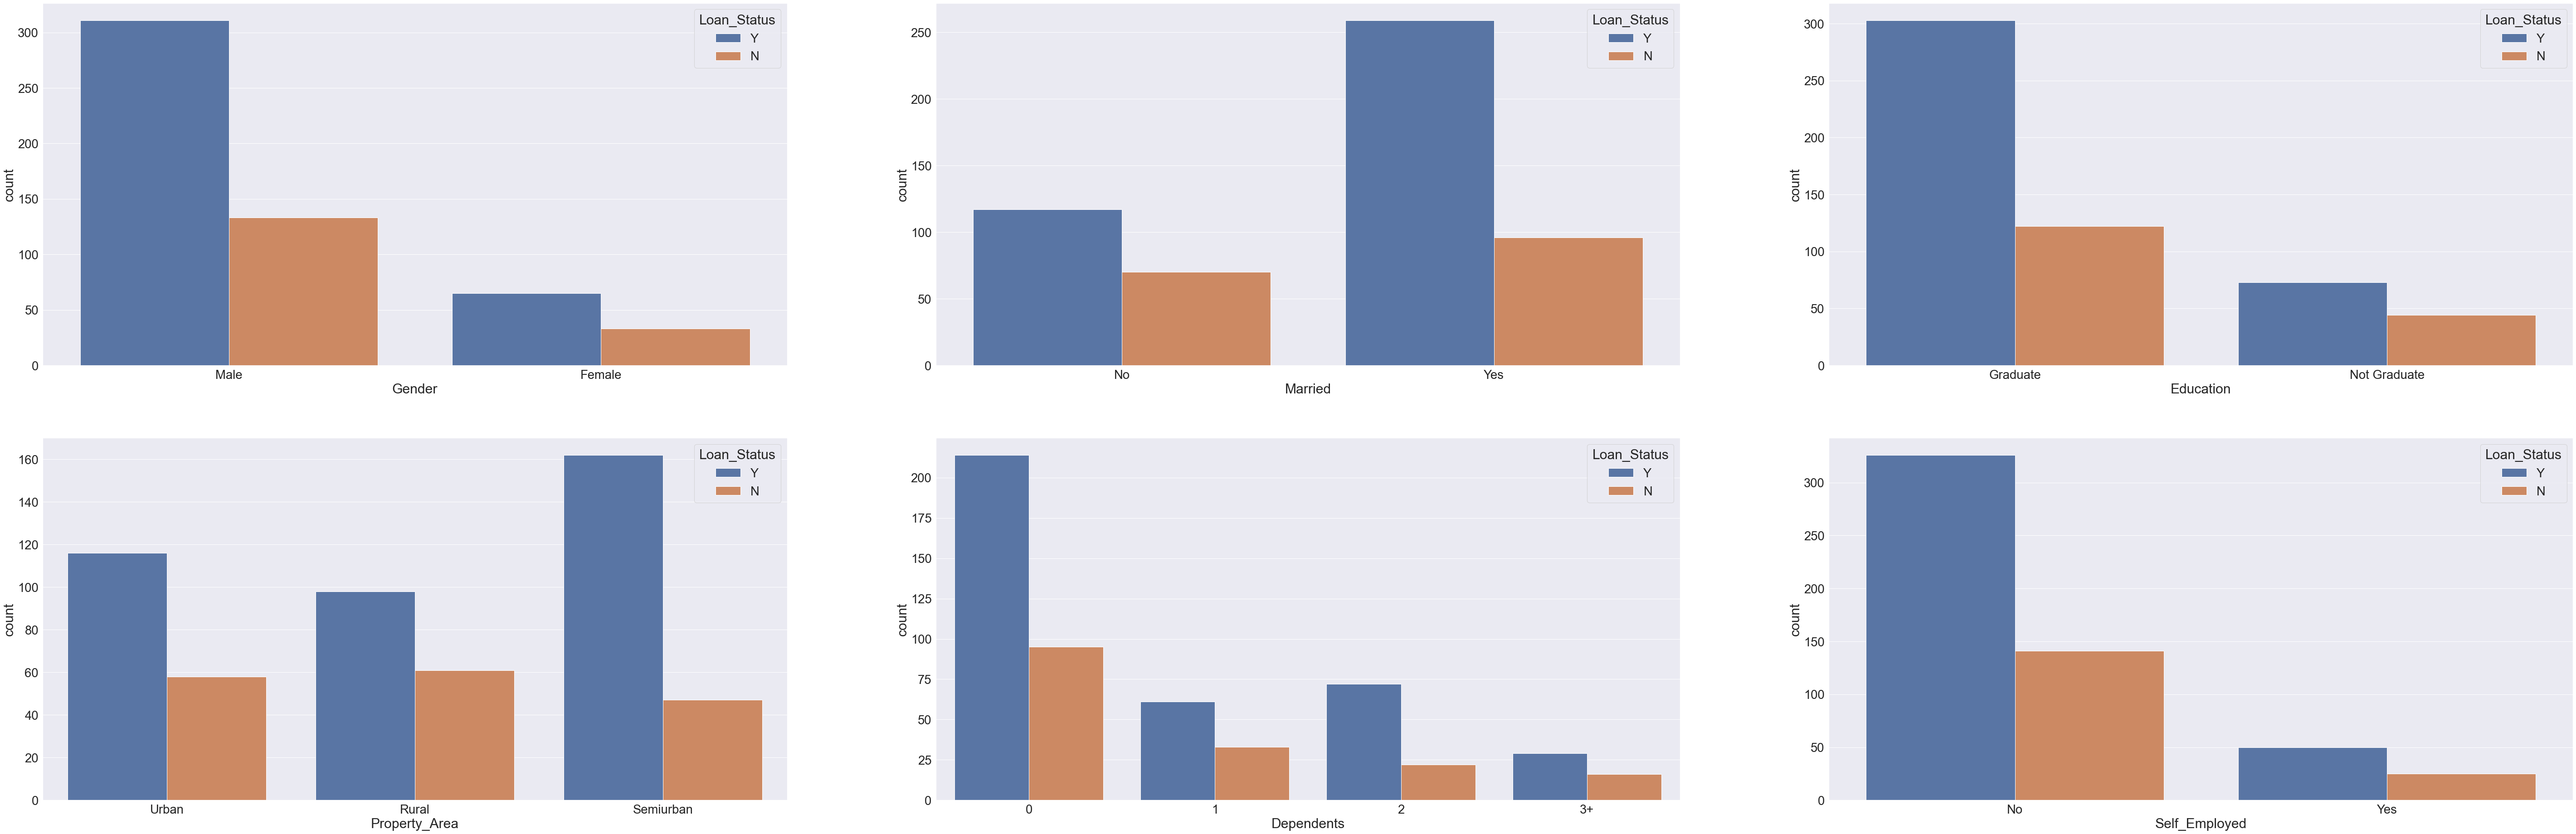

In [13]:
plt.figure(figsize=(100,50))  #figuresize define
sns.set(font_scale=2.5) #fontsize 
plt.subplot(331)
sns.countplot(Loan["Gender"],hue=Loan["Loan_Status"])
plt.subplot(332)
sns.countplot(Loan["Married"],hue=Loan["Loan_Status"])
plt.subplot(333)
sns.countplot(Loan["Education"],hue=Loan["Loan_Status"])
plt.subplot(334)
sns.countplot(Loan["Property_Area"],hue=Loan["Loan_Status"])
plt.subplot(335)
sns.countplot(Loan["Dependents"],hue=Loan["Loan_Status"])
plt.subplot(336)
sns.countplot(Loan["Self_Employed"],hue=Loan["Loan_Status"])


In [14]:
#converting in numeric values
Loan["Loan_Status"].replace("Y",1,inplace=True)
Loan["Loan_Status"].replace("N",0,inplace=True)

In [15]:
Loan["Loan_Status"].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [16]:
Loan.Gender=Loan.Gender.map({"Male":1,"Female":0})
Loan["Gender"].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [17]:
Loan.Married=Loan.Married.map({"Yes":1,"No":0})
Loan["Married"].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [18]:
Loan.Dependents=Loan.Dependents.map({"0":0,"1":1,"2":2,"3+":3})
Loan["Dependents"].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [19]:
Loan.Education=Loan.Education.map({"Graduate":1,"Not Graduate":0})
Loan["Education"].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [20]:
Loan.Self_Employed=Loan.Self_Employed.map({"Yes":1,"No":0})
Loan["Self_Employed"].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [21]:
Loan.Property_Area=Loan.Property_Area.map({"Rural":0,"Semiurban":1,"Urban":2})
Loan["Property_Area"].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [22]:
Loan["LoanAmount"].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [23]:
Loan["Loan_Amount_Term"].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
Loan["Credit_History"].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [25]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [26]:
#Importing packages for classification

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [27]:
x=Loan.iloc[1:542,1:12].values
y=Loan.iloc[1:542,12].values

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
model=LogisticRegression()

In [30]:
model.fit(x_train,y_train)

C:\Users\Pranali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
d_prediction=model.predict(x_test)
print("Logistic Regression Accuracy=",metrics.accuracy_score(d_prediction,y_test))

Logistic Regression Accuracy= 0.7852760736196319


In [32]:
predicted=d_prediction

In [33]:
actual=Loan["Loan_Status"]

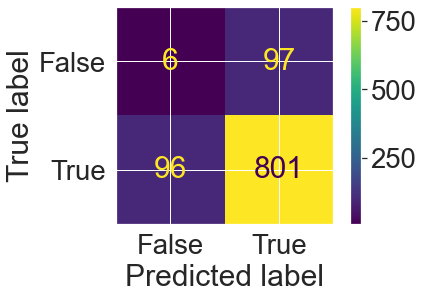

In [34]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()